# Linear Regression for Machine Learning: The Basics

There's one frequent question I hear often when people inquire about the Data Science field. Do I need to know math? And to many people's chagrin, the answer is yes, especially for Machine Learning. The good thing to know is that you DONT need to be a math wizz to understand the fundemental math concepts for the field. The beauty of applications like Python and R is that they have many tools that do much of the heavy lifting when it comes to implementing mathematical theories on your dataset, but here needs to be a willingness to understand the science behind what you create so you know how to treat your data. 
Statistics in particular is a necessary curriculum you'll need for Machine Learning and the perfect place to start is with Linear Regression. This guide will walk through the basics of using Linear Regression for Machine Learning and will hopefully act as a reference as well.

## What exactly is Linear Regression?

Linear Regression is a type of statistical analysis that is used to find a relationship between one more more features(independent variable) and a target variable (dependent variable) It can be used to forecast sales, prices, and can even used to gain insights about customer behavior. You can bucket most linear regression analyses into two types:
- 1. **Univariate Linear Regression:** Only one feature is used in your model
- 2. **Multivariate Linear Regression:** More than one feature is used in your model 

### Structure of Linear Regression

The linear regression model can be summarized by the following equation:

![linear_equation.png](linear_equation.png)

or

- Y is the predicted value. 
- This equation is also known as the hypothesis function h(x). 
- θ1.......,θn are our model parameters or the coefficients of the features of our model. They are the foundation of our predicted values 
- θ-zero is the bias term and is also the value of the equation if all of our other features have a coefficient of 0. Its also known as the intercept

This would also be our theoretical equation for our *line of best fit* or our *regression line*. If we plotted our feautures or independent variables individually against our target variable we would get a scatter plot. Lets create one to get a better understanding of what I mean. We will create some data for a dependent variable y and one independent variable x.

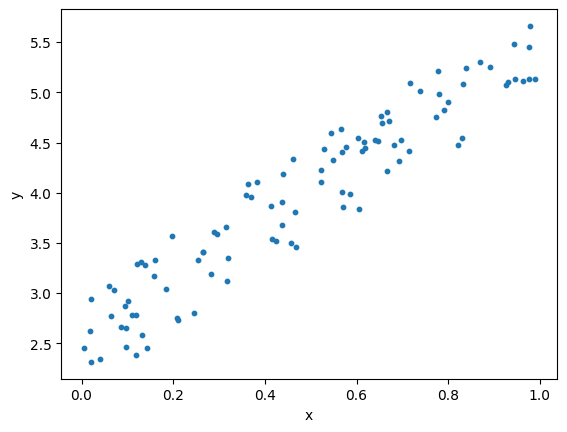

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# generate random data-set
np.random.seed(0)
# x is our independent variable or feature
x = np.random.rand(100, 1)
# y is our dependent variable or target variable
y = 2 + 3 * x + np.random.rand(100, 1)

# lets take a look at the relationship by using a scatter plot
plt.scatter(x,y,s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Our line of best fit's job *(which represents our equation)* is to try and get a sense of the best or *optimal* values that would help us hit most of our observations on the scatterplot. If our line of best fit does a good job, we should be able to take it and use it to predict our Y variables fairly accurately for similar datasets that have different observations

### How do we determine our line of best fit?

As mentioned before, our line of best fits job is to hit as many points as it can on our scatter plot. If it does its job well, the distance between our line and each of our data points would be very small. The distance between each of our predicted values(represented by our line of best fit) and the actual data observations is known as an error term or a residual. Lets take a look at a visual representation of this.

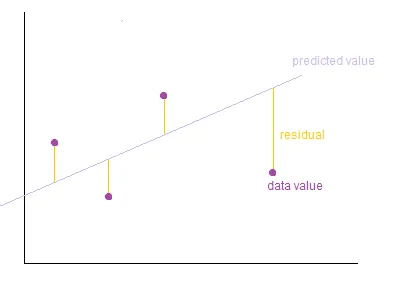

The sum of all of our error terms is measured by something called the *cost function* which is defined as the sum of the squares of all of our residuals. This is how our cost function looks like for a specific feature or parameter

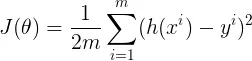

*h(x)* represents the hypothesis function we mentioned before, and it is essentially the value we got for Y with our equation - our predicted value. The predicted value is subtracted from the actual value in the data to get our error for one observation. We then do this for each and every observation, add them all up and square them. The huge E seen in the equation represents the summing up all of the error terms for each of our observations. You may ask why we also square our error term. This is done so we can get the absolute values for all our observations. That way any negative values are transformed into positives before we add them up. We also do this to penalize data points which are further away from the regression line much more than the points which lie close to the line. The *m* in our equation represents the number of training sets we have

Our objective in all of this is find the best or *optimal* parameters (represented by θ) for each of our features (represented by x) to minimize the cost function or the loss function. We could do this using the Normal Equation or with something called [**Gradient Descent**](https://builtin.com/data-science/gradient-descent).

### Gradient Descent

Gradient descent is an algorithm used in many machine learning algorithms. What it does is that it tweaks and changes our parameters of our model to minimize the cost function discussed before. These are the steps of gradient descent:
1. First you plug in some random values for your model parameters to start off with. This is known as random initialization, because we need to start off somewhere

2. Now you have to measure how the cost function changes with each change in the parameter to see if its increasing, decreasing, ect. This can be measured by computing something called the partial derivative of the cost function which essentially captures how our parameters are changing. Our cost function would have to be convex and would have to have a global mimima, representing 0 meaning that is our optimal parameter, the lowest point on our curve. What this is essentially doing is capturing the slope as our parameter is travelling down to the global mimima. We give the algorithm a certain number of iterations to indicate how many attempts we want it to make to get to our global or local minima. This could be any number from 1 to 100000, but we need a number large enough to get it to our optimal parameter. 

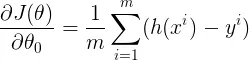

3. Now after getting the derivative, you now have to update the parameters and change them simultaneously to see how it impacts our cost function. Our derivative is multiplied by something called the *learning rate* which represented by a. This learning rate will determine how fast or how slow our parameters move towards our desired local optima. We never want to have a learning rate that is too big or too small. If our learning rate is small it will take forever for us to get to our optimal parameter. But even worse, if it is too big we could completely overshoot and whizz past our desired parameters. Note that if we have more than 1 parameter, we would have to plug in the changes simultaneously to see how each change for every coefficient on our feature is impacting the cost function. 

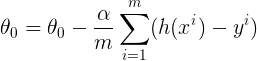

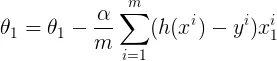

I like to think of Gradient Descent from the perspective of a hiker embarking on a journey down a valley to find a natural spring to quench their thirst. They start of at ground 0, unsure of what lies in wait for them, but step by step, put one foot in front of the other to traverse the valley on a quest to save themselves from dying of dehydration. They can't run or walk too fast, else they might end up rolling down the hill to quickly and might shoot right past the spring, but they also cant walk too slow or they'll be dead before they get there. They have to take slow measured steps and try their best to track their journey so they can find their way back once they find what they're looking for. 

### Hyperparameters

Often with machine learning algorithms, you'll often hear the word hyperparameters. In machine learning, a hyperparameter is a parameter whose value is used to control the learning process. With the gradient descent algorithm, our hyperparameters are our learning rate (a) and the number of iterations we need for our parameter to get to the local or global minima. We can randomly choose the values of these hyperparameteres but as I'm sure you've noticed, there's always an optimization framework for anything with Machine Learning. To choose optimal hyperparameters we can employ an algorithm called [GridSearch](https://www.mygreatlearning.com/blog/gridsearchcv/#:~:text=Grid%20search%20is%20a%20method,learning%20rate%20of%20the%20optimiser). We won't be implementing it in this example since that's for more advanced Machine Learning models, but it will be further discussed in later blogs. 

Lets implement the gradient descent algorithm from scratch and see how it's able to decrease our cost function overtime

Theta: [[2.89623533]
 [2.26925024]]


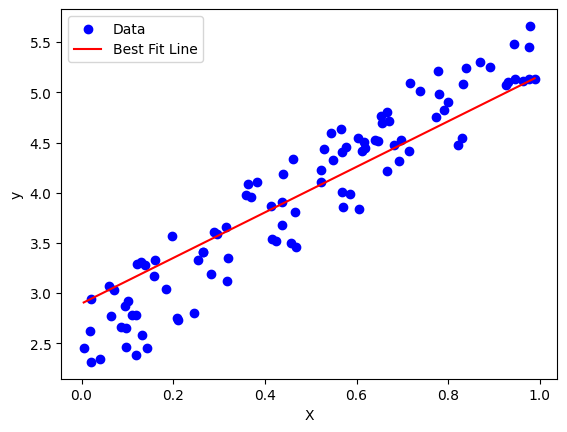

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: We have to Initialize our parameters and hyperparameters
theta = np.zeros((2, 1))  # Theta represents our coefficients [theta0, theta1]
learning_rate = 0.01 # This represents our learning rate
num_iterations = 1000 # This reprents how many times we are going to go down the curve

# Step 2: Define the cost function
def cost_function(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    error = predictions - y
    cost = (1/(2*m)) * np.sum(np.square(error))
    return cost

# Step 3: Calculate the gradients
def compute_gradients(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    error = predictions - y
    gradients = (1/m) * X.T.dot(error)
    return gradients

# Step 4: Update the parameters
def update_parameters(theta, gradients, learning_rate):
    theta = theta - learning_rate * gradients
    return theta

# Step 5: Perform gradient descent
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    costs = []

    for i in range(num_iterations):
        gradients = compute_gradients(X, y, theta)
        theta = update_parameters(theta, gradients, learning_rate)
        cost = cost_function(X, y, theta)
        costs.append(cost)

    return theta, costs

# Add a column of ones to x for the intercept term
X = np.c_[np.ones((100, 1)), x]

# Perform gradient descent
theta, costs = gradient_descent(X, y, theta, learning_rate, num_iterations)

# Print the learned parameters
print("Theta:", theta)

# Plot the data points
plt.scatter(x, y, c='b', label='Data')

# Plot the best fit line
x_line = np.array([np.min(x), np.max(x)])
y_line = theta[0] + theta[1] * x_line
plt.plot(x_line, y_line, c='r', label='Best Fit Line')

plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

Now that we've gotten our best fit line, which looks pretty good, lets now visualize how our cost function changed across each iteration. 

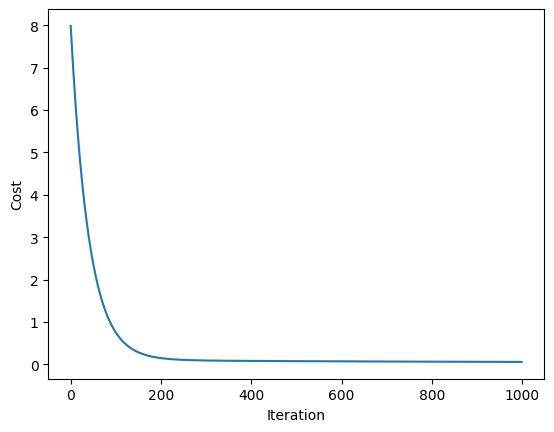

In [28]:
import matplotlib.pyplot as plt
plt.plot(range(num_iterations), costs)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

We can see that our cost function dramatically dipped almost to 0 as we got closer to the 200th iteration, showing the how powerful the gradient descent algorithm can be for finding optimal parameters. Now lets get a more objective sense of how our moel is performing using Scikit Learns Linear Regression Model framework. 

Slope: [[2.93655106]]
Intercept: [2.55808002]
Root mean squared error:  0.07623324582875007
R2 score:  0.9038655568672764


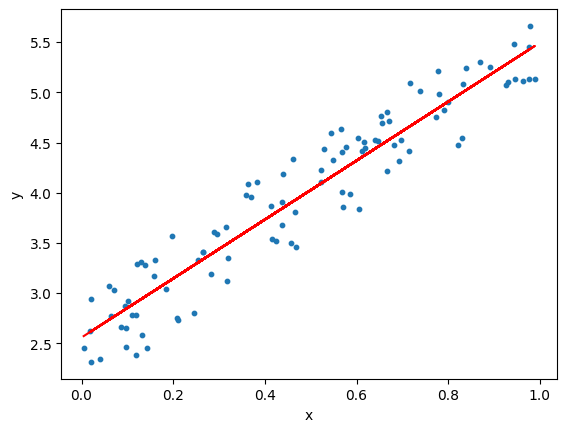

In [29]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x, y)
# Predict
y_predicted = regression_model.predict(x)

# model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# plotting values

# data points
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')

# predicted values
plt.plot(x, y_predicted, color='r')
plt.show()

We clearly have some very good metrics here with an R2 of 90% meaning our model explains about 90% of the variation in our data and we also have a RMSE of 0.07, which is quite low and is also a good sign our model is perfomrting well.  